In [253]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#### CMPS 3160-01 Fa23

#### Collette Riviere and Toby Mendels

#### Link to our GitHub Webpage: https://criviere1.github.io/


# Project Goals
The team, **Collette Riviere and Toby Mendels**, will likely be investigating data sets related to covid-19 infection rates, vaccine hesitancy rates, actual Covid-19 vaccine rates, and more. Most of the data will come from the US Census Bureau, specifically the Household Pulse Survey. From this survey, we are interested in vaccine hesitancy by state. The Covid-19 vaccine was a devicive issue for many people so looking at vaccine hesitency before the Covid-19 pandemic could help indicate which parts of the US could be most reluctant or hesitant about the Covid-19 vaccines. This relates to the second dataset, daily Covid-19 infection reports across states. This dataset can help investigate how Covid-19 spread across the USA from Janurary 2020 to March 2023 and how different states were affected by the pandemic over time. These datasets in conjunction can help answer questions such as, "Did states with more vaccine hesitancy have higher rates of Covid-19 infection, especially after the Covid-19 vaccine was released?" and "Did vaccines decrease the Covid-19 infection rate (assuming people with little vaccine hesitancy got the Covid-19 vaccine)?". Some additonal data on actual vaccine rates could support these questions as well. Inital steps to answer these questions would be analyze the correlation between each dataset. Additionally, comparing the rates of Covid-19 cases before and after the vaccine was rolled out would help to start addressing the question of whether the vaccine redcued Vodi-19 rates.


The data we are using from the Household Pulse Survey is found here: https://data.cdc.gov/Vaccinations/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/q9mh-h2tw/data.

COVID-19 infection reports can be found here: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/README.md.


### Collaboration Plan
The team plans to meet every other week to work on this project to finalize the project, discuss next steps, and help each other. We will also be communicating over text messages to update each other with our progress. We have also set up a shared Github repository to house and update our code.

# Table 1: Vaccine hesitancy statistics by county

We start by reading the csv into a data frame and deleting the columns that we don't need such as the state boundaries, county boundaries, and geographical point (longtitide and latitude).

In [252]:
url = "https://data.cdc.gov/api/views/q9mh-h2tw/rows.csv?accessType=DOWNLOAD"

hesitancy_df = pd.read_csv(url)
hesitancy_df.drop(labels=['County Boundary', 'State Boundary', 'Geographical Point'], axis=1, inplace=True)
hesitancy_df.head()

KeyboardInterrupt: 

Then we can make a correlation table of all the quantitaive variables to get some ideas of what variables correlate with what. This will help give us a basic idea of what we should look at more and what we will be able to take away from this data table. We can also look at some basic summary statistics for the variables to give us a better picture of the data

In [ ]:
variables = ['Estimated hesitant', 
             'Estimated hesitant or unsure', 
             'Estimated strongly hesitant', 
             'Social Vulnerability Index (SVI)',
              'CVAC level of concern for vaccination rollout',
               'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)',
                'Percent Hispanic',
                'Percent non-Hispanic American Indian/Alaska Native',
                'Percent non-Hispanic Asian',
                'Percent non-Hispanic Black',
                'Percent non-Hispanic Native Hawaiian/Pacific Islander',
                'Percent non-Hispanic White'
                     ]
hesitancy_df[variables].corr()

,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
Estimated hesitant,1.000000,0.961811,0.975274,0.282310,0.338086,-0.199502,-0.210853,0.173319,-0.269042,0.159336,-0.047019,0.000838
Estimated hesitant or unsure,0.961811,1.000000,0.938115,0.386490,0.438484,-0.277029,-0.195632,0.154750,-0.303635,0.288680,-0.064783,-0.085858
Estimated strongly hesitant,0.975274,0.938115,1.000000,0.299722,0.350317,-0.205624,-0.205454,0.198035,-0.263052,0.171879,-0.048325,-0.023501
Social Vulnerability Index (SVI),0.282310,0.386490,0.299722,1.000000,0.717859,-0.276399,0.313903,0.167560,-0.058608,0.475836,0.000462,-0.615726
CVAC level of concern for vaccination rollout,0.338086,0.438484,0.350317,0.717859,1.000000,-0.401594,0.323777,0.139995,-0.139841,0.359244,0.002739,-0.512439
Percent adults fully vaccinated against COVID-19 (as of 6/10/21),-0.199502,-0.277029,-0.205624,-0.276399,-0.401594,1.000000,0.096973,0.148729,0.266810,-0.253635,0.067014,0.042492
Percent Hispanic,-0.210853,-0.195632,-0.205454,0.313903,0.323777,0.096973,1.000000,-0.042063,0.138102,-0.115655,0.017473,-0.601836
Percent non-Hispanic American Indian/Alaska Native,0.173319,0.154750,0.198035,0.167560,0.139995,0.148729,-0.042063,1.000000,-0.018333,-0.102222,0.017776,-0.293375
Percent non-Hispanic Asian,-0.269042,-0.303635,-0.263052,-0.058608,-0.139841,0.266810,0.138102,-0.018333,1.000000,0.016760,0.375992,-0.279602
Percent non-Hispanic Black,0.159336,0.288680,0.171879,0.475836,0.359244,-0.253635,-0.115655,-0.102222,0.016760,1.000000,-0.036959,-0.591361


In [ ]:
hesitancy_df[variables].describe()

,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
count,3142.000000,3142.000000,3142.000000,3141.000000,3142.000000,2864.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.132600,0.191429,0.086653,0.500000,0.499965,0.399398,0.094184,0.018463,0.013621,0.089259,0.000919,0.762499
std,0.046337,0.053494,0.032938,0.288842,0.288832,0.142893,0.138647,0.076340,0.027665,0.144283,0.006240,0.202157
min,0.026900,0.049900,0.018600,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006900
25%,0.098300,0.148500,0.062325,0.250000,0.250000,0.318000,0.022200,0.001200,0.002800,0.006500,0.000000,0.644450
50%,0.131800,0.190100,0.084900,0.500000,0.500000,0.400000,0.042300,0.002800,0.006100,0.021900,0.000100,0.837400
75%,0.161725,0.228800,0.104475,0.750000,0.750000,0.494000,0.096800,0.006900,0.012800,0.098400,0.000600,0.924875
max,0.267000,0.323300,0.182400,1.000000,1.000000,0.999000,0.991700,0.919000,0.417300,0.872300,0.272700,1.000000


We can see that the 3 columns that talk about hesitancy are very strongly correlated, and when we look at summary statistics, we can see that on average the "Estimated hesitant or unsure" is slightly higher than the "Estimated hesitant" and the "Estimated strongly hesitant" is slightly below. Knowing this, we will look only at the "Estimated hesitant" column in order to simplify things.

In [ ]:
hesitancy_df.drop(labels=['Estimated hesitant or unsure', 'Estimated strongly hesitant'], axis=1, inplace=True)

The social vulernability index is define as "a database that helps emergency response planners and public health officials identify, map, and plan support for communities that will most likely need support before, during, and after a public health emergency." It acts as an estimate of how much support a county will need in the event of a punlic health emergency based off a large number of factors. Below we can make a scatter of the percent of a county that is white compared to the SVI. The colors show the CVAC level of concern for the vaccine rollout. The CVAC shows concern rolling out the vaccine due to the following 5 factors: "historic undervaccination, sociodemographic barriers, resource-constrained healthcare system, healthcare accessibility barriers, and irregular care-seeking behaviors."

<Axes: xlabel='[Percent non-Hispanic White]', ylabel='Social Vulnerability Index (SVI)'>

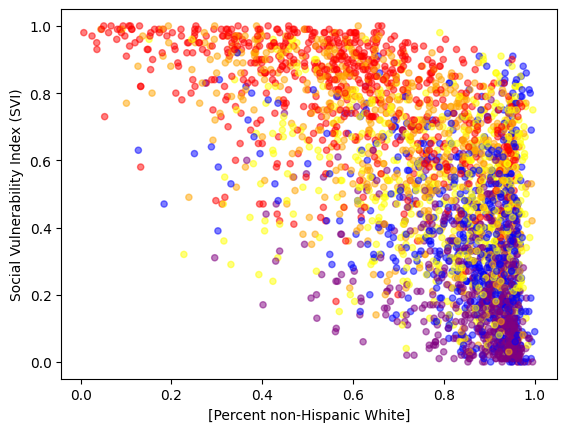

In [ ]:
colors = hesitancy_df['CVAC Level Of Concern'].map({
    'Very High Concern' : 'red',
    'High Concern' : 'orange',
    'Moderate Concern' : 'yellow',
    'Low Concern' : 'blue',
    'Very Low Concern' : 'purple',
    
})

hesitancy_df.plot.scatter(x=['Percent non-Hispanic White'], y='Social Vulnerability Index (SVI)', c = colors, alpha = 0.5)

# Table 2: Confirmed Covid-19 cases by state, 2020:2023

This data is from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. Over the course of three years, (1/22/20 to 3/9/23) data on the daily confirmed cases, deaths, and recoveries from Covid-19 were published to this Github repository: https://github.com/CSSEGISandData/COVID-19.git. The data is reported by city and state, but for ease, we chose to look at the state level so rows were aggregated to one row per state (or territory). Additionally, this dataset is being used to look at Covid-19 cases over time (dates), all other columns were dropped.

In [296]:
confirmed_df = pd.read_csv("/Users/colletteriviere/CMPS3160_FinalProject/datasets/time_series_covid19_confirmed_US.csv")
confirmed_df.drop(columns=['iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','UID','Admin2','Combined_Key'], inplace=True)
confirmed_df.head() 

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Alabama,0,0,0,0,0,0,0,0,0,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,Alabama,0,0,0,0,0,0,0,0,0,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,Alabama,0,0,0,0,0,0,0,0,0,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,Alabama,0,0,0,0,0,0,0,0,0,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,Alabama,0,0,0,0,0,0,0,0,0,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [297]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}

In [298]:
confirmed_state_by_day = confirmed_df.groupby('Province_State').sum() 
confirmed_state_by_day.drop(labels=['American Samoa','Diamond Princess','Grand Princess', 'Guam','Northern Mariana Islands','Puerto Rico','Virgin Islands'], axis='index', inplace=True)
confirmed_state_by_day.rename(us_state_to_abbrev, inplace=True)
confirmed_state_by_day 

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Province_State,,,,,,,,,,,,,,,,,,,,,
AL,0,0,0,0,0,0,0,0,0,0,...,1638348,1642062,1642062,1642062,1642062,1642062,1642062,1642062,1644533,1644533
AK,0,0,0,0,0,0,0,0,0,0,...,307073,307073,307073,307073,307073,307073,307073,307655,307655,307655
AZ,0,0,0,0,1,1,1,1,1,1,...,2434631,2440294,2440294,2440294,2440294,2440294,2440294,2440294,2443514,2443514
AR,0,0,0,0,0,0,0,0,0,0,...,1004752,1004752,1005212,1005464,1005790,1005847,1005930,1006336,1006622,1006883
CA,0,0,0,0,2,2,2,2,2,3,...,12097613,12097613,12107856,12110179,12110179,12110179,12110179,12120965,12120965,12129699
CO,0,0,0,0,0,0,0,0,0,0,...,1760491,1761332,1761332,1763021,1763021,1763021,1763574,1763574,1764401,1764401
CT,0,0,0,0,0,0,0,0,0,0,...,975241,975405,975537,975727,976011,976074,976156,976310,976494,976657
DE,0,0,0,0,0,0,0,0,0,0,...,330332,330793,330793,330793,330793,330793,330793,330793,330793,330793
DC,0,0,0,0,0,0,0,0,0,0,...,177504,177504,177714,177714,177714,177714,177714,177714,177714,177945


Now, we can look at the cases of covid over 3 years, state by state. This is give us an idea of trends of reported covid cases over time and how they vary state to state. Below is a plot of daily reported covid-19 cases, from 1/22/20 to 3/9/23. 

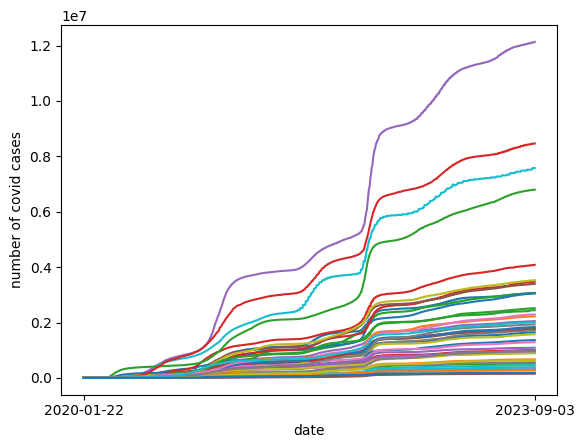

In [299]:
for i in confirmed_state_by_day.index:
    plt.plot(confirmed_state_by_day.loc[i])

plt.xticks(ticks=[0,1142], labels=['2020-01-22','2023-09-03'])
plt.xlabel('date')
plt.ylabel('number of covid cases')
#plt.legend(loc='upper left')
plt.show()


From the plot, we can see that some states has many more Covid-19 cases than others, some saw outbreaks when others didnt, and some didn't have many Covid-19 cases at all. This can help us answer questions about how Covid-19 impacted different states and what states were impacted the most at different times.

To look at this data a bit closer, we can look at the average number of cases every month. First, we can calculate the average number of cases over each month and three months period of the dataset. Then we can look at the summary statistics for that data.

In [300]:
confirmed_state_by_day.columns = pd.to_datetime(confirmed_state_by_day.columns, dayfirst=True, format='mixed')
confirmed_day = confirmed_state_by_day
confirmed_day 

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-02-28,2023-01-03,2023-02-03,2023-03-03,2023-04-03,2023-05-03,2023-06-03,2023-07-03,2023-08-03,2023-09-03
Province_State,,,,,,,,,,,,,,,,,,,,,
AL,0,0,0,0,0,0,0,0,0,0,...,1638348,1642062,1642062,1642062,1642062,1642062,1642062,1642062,1644533,1644533
AK,0,0,0,0,0,0,0,0,0,0,...,307073,307073,307073,307073,307073,307073,307073,307655,307655,307655
AZ,0,0,0,0,1,1,1,1,1,1,...,2434631,2440294,2440294,2440294,2440294,2440294,2440294,2440294,2443514,2443514
AR,0,0,0,0,0,0,0,0,0,0,...,1004752,1004752,1005212,1005464,1005790,1005847,1005930,1006336,1006622,1006883
CA,0,0,0,0,2,2,2,2,2,3,...,12097613,12097613,12107856,12110179,12110179,12110179,12110179,12120965,12120965,12129699
CO,0,0,0,0,0,0,0,0,0,0,...,1760491,1761332,1761332,1763021,1763021,1763021,1763574,1763574,1764401,1764401
CT,0,0,0,0,0,0,0,0,0,0,...,975241,975405,975537,975727,976011,976074,976156,976310,976494,976657
DE,0,0,0,0,0,0,0,0,0,0,...,330332,330793,330793,330793,330793,330793,330793,330793,330793,330793
DC,0,0,0,0,0,0,0,0,0,0,...,177504,177504,177714,177714,177714,177714,177714,177714,177714,177945


In [301]:
# month average
onemonthaverage = confirmed_day.T.resample('1M').mean().T
onemonthaverage.describe()

,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,43694.106443,33157.957983,32071.581046,43070.317782,52002.580392,61855.389452,82066.775817,103588.800000,118522.886410,138911.267974,...,1.984154e+06,1.985479e+06,1.986163e+06,1.986790e+06,1.987357e+06,1.988342e+06,1.989454e+06,1.979290e+06,1.980679e+06,1.981329e+06
std,51295.560873,38850.111027,37757.834203,55124.290352,65724.826449,75579.069808,103040.912443,134197.026613,149930.293285,166024.176707,...,2.276330e+06,2.277315e+06,2.278209e+06,2.279267e+06,2.279887e+06,2.280279e+06,2.281853e+06,2.271053e+06,2.272360e+06,2.272600e+06
min,697.095238,533.928571,568.866667,1041.068966,1130.233333,1274.034483,1403.866667,1529.866667,1639.000000,1835.766667,...,1.501793e+05,1.503267e+05,1.503267e+05,1.503267e+05,1.503267e+05,1.508127e+05,1.508127e+05,1.499100e+05,1.501415e+05,1.501415e+05
25%,9913.047619,7551.017857,7262.533333,9722.293103,10825.966667,12728.275862,18196.300000,22129.750000,24688.758621,32407.533333,...,5.381360e+05,5.383235e+05,5.385592e+05,5.385592e+05,5.385592e+05,5.389162e+05,5.393483e+05,5.368860e+05,5.371212e+05,5.374900e+05
50%,27995.761905,21247.678571,21410.400000,28688.137931,32815.900000,39798.551724,50037.433333,62623.000000,74730.310345,92539.700000,...,1.343635e+06,1.344777e+06,1.345221e+06,1.346151e+06,1.346994e+06,1.347324e+06,1.348204e+06,1.341492e+06,1.341942e+06,1.342442e+06
75%,51503.261905,39161.535714,38407.633333,49228.379310,56949.816667,70132.017241,94936.250000,113544.133333,129907.379310,155956.500000,...,2.330016e+06,2.331048e+06,2.331048e+06,2.331048e+06,2.333156e+06,2.334221e+06,2.334221e+06,2.321948e+06,2.323791e+06,2.323791e+06
max,224377.666667,170194.821429,162398.633333,293219.724138,354741.500000,374319.172414,439638.033333,593203.633333,671557.793103,746430.000000,...,1.199648e+07,1.199742e+07,1.200118e+07,1.200416e+07,1.201008e+07,1.201025e+07,1.201880e+07,1.197595e+07,1.197747e+07,1.197817e+07


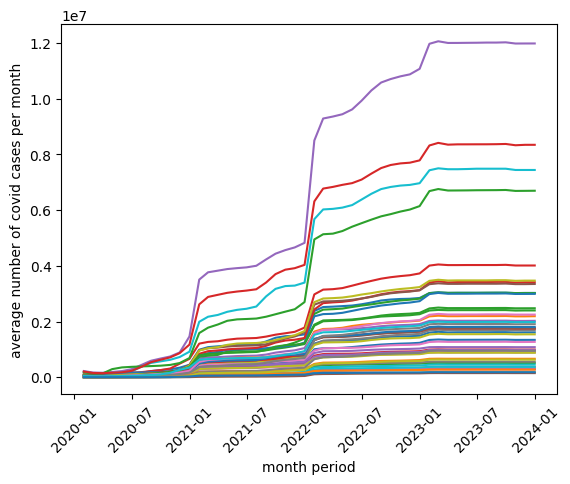

In [306]:
plt.plot(onemonthaverage.T)
plt.xticks(rotation=45)
plt.xlabel('month period')
plt.ylabel('average number of covid cases per month')
plt.show()

In [308]:
# 3 month average
threemonthaverage = confirmed_day.T.resample('Q').mean().T
threemonthaverage.describe()

,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-31,2023-03-31,2023-06-30,2023-09-30,2023-12-31
count,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,35546.158104,52305.942291,101200.348094,1.950899e+05,5.983753e+05,6.616631e+05,7.263728e+05,8.490995e+05,1.553784e+06,1.642817e+06,1.756333e+06,1.822096e+06,1.986605e+06,1.986144e+06,1.988384e+06,1.980433e+06
std,41732.637940,65354.022704,128425.018412,2.162938e+05,6.981056e+05,7.624561e+05,8.386158e+05,9.514175e+05,1.752052e+06,1.857789e+06,2.007076e+06,2.080673e+06,2.278599e+06,2.278264e+06,2.280673e+06,2.272004e+06
min,590.569620,1148.238636,1522.955056,3.121438e+03,1.879923e+04,2.451600e+04,2.727910e+04,3.999497e+04,1.145870e+05,1.277430e+05,1.345699e+05,1.389483e+05,1.504521e+05,1.503267e+05,1.506507e+05,1.500643e+05
25%,8069.348101,11209.017045,21795.016854,5.140333e+04,1.650940e+05,1.827445e+05,2.018024e+05,2.579093e+05,4.435695e+05,4.699329e+05,4.923083e+05,5.045791e+05,5.383146e+05,5.384806e+05,5.389412e+05,5.371658e+05
50%,23141.784810,33756.715909,62988.528090,1.361817e+05,4.046551e+05,4.550364e+05,5.184968e+05,6.002244e+05,1.031003e+06,1.086307e+06,1.170677e+06,1.220653e+06,1.346715e+06,1.345383e+06,1.347507e+06,1.341958e+06
75%,42213.854430,59298.079545,112913.775281,2.564180e+05,7.369133e+05,8.236346e+05,8.980089e+05,1.055753e+06,1.832893e+06,1.948037e+06,2.054817e+06,2.130174e+06,2.331972e+06,2.331048e+06,2.333866e+06,2.323176e+06
max,181637.278481,340919.011364,566971.078652,1.035505e+06,3.697149e+06,3.914732e+06,4.219488e+06,4.682870e+06,9.037590e+06,9.658389e+06,1.052205e+07,1.091247e+07,1.200740e+07,1.200092e+07,1.201304e+07,1.197720e+07


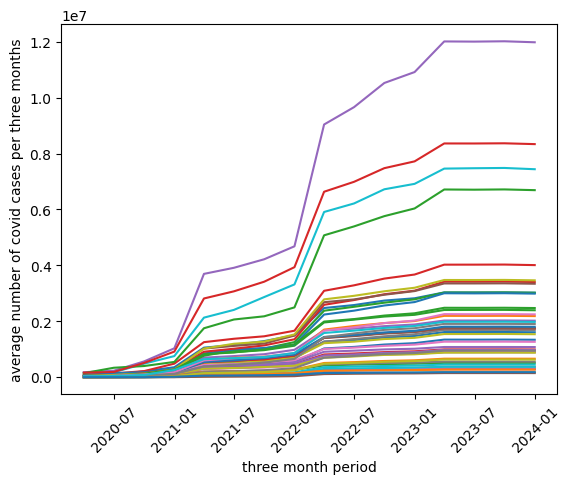

In [309]:
plt.plot(threemonthaverage.T)
plt.xticks(rotation=45)
plt.xlabel('three month period')
plt.ylabel('average number of covid cases per three months')
plt.show()

From these summary statistics, there was a massive increase in cases from Feburary to March in 2020 (increased 2500 fold) and also from May to June 2020 (increased 10 fold). After the Covid-19 vaccine was released (December 2020), the following months (Janurary 2021 to July 2021) saw cases plateu. This can help speak to the effectiveness of the vaccine and also potentially quarentine.